In [1]:
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt

dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda skill_list: ast.literal_eval(skill_list) 
    if isinstance(skill_list, str) else skill_list)

df_DA = df[df['job_title_short']=='Data Analyst'].copy()

c:\Users\DeLL\anaconda3\envs\python_course\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


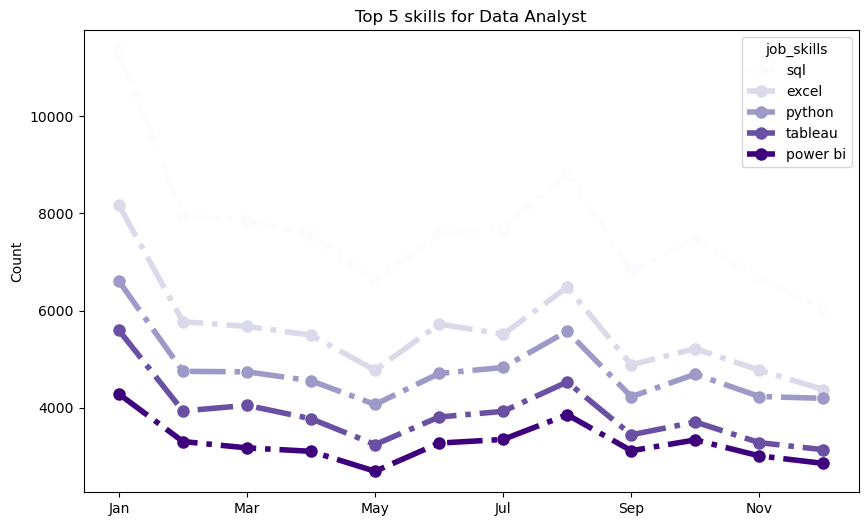

In [22]:
#Trending skills exercises chart
df_DA['job_posted_month_no'] = df_DA['job_posted_date'].dt.month
df_DA_exploded = df_DA.explode('job_skills')
df_DA_pivot = df_DA_exploded.pivot_table(index='job_posted_month_no', columns= 'job_skills', aggfunc='size', fill_value= 0)
df_DA_pivot = df_DA_pivot.reset_index()
df_DA_pivot['job_posted_month'] = df_DA_pivot['job_posted_month_no'].apply(lambda x: pd.to_datetime(x,format='%m').strftime('%b'))
df_DA_pivot = df_DA_pivot.set_index('job_posted_month')
df_DA_pivot = df_DA_pivot.drop(columns='job_posted_month_no')
df_DA_pivot.loc['Total'] = df_DA_pivot.sum()
df_DA_pivot = df_DA_pivot[df_DA_pivot.loc['Total'].sort_values(ascending=False).index]
df_DA_pivot = df_DA_pivot.drop('Total')
df_DA_pivot.iloc[:, :5].plot(kind='line',
        linewidth = 4,
        linestyle = '-.',
        colormap = 'Purples',
        markersize = 8,
        marker = 'o',
        figsize = (10,6)
)
plt.title('Top 5 skills for Data Analyst')
plt.xlabel('')
plt.ylabel('Count')
plt.show()

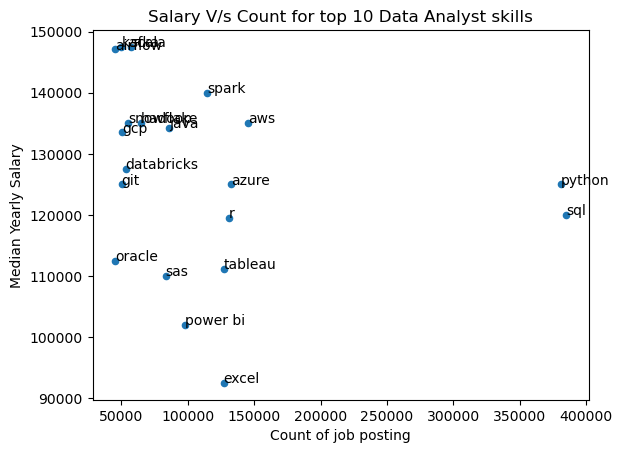

In [58]:
df_exploded = df.explode('job_skills')
skill_stats = df_exploded.groupby('job_skills').agg(
    skill_count = ('job_skills','count'),
    median_salary = ('salary_year_avg','median')
)

skill_count = 20
skill_stats = skill_stats.sort_values(by='skill_count', ascending=False).head(skill_count)
skill_stats.plot(kind='scatter',x='skill_count',y='median_salary')
plt.xlabel('Count of job posting')
plt.ylabel('Median Yearly Salary')
plt.title('Salary V/s Count for top 10 Data Analyst skills')
for i,txt in enumerate(skill_stats.index):
    plt.text(skill_stats['skill_count'].iloc[i], skill_stats['median_salary'].iloc[i], txt)
plt.tight_layout
plt.show()

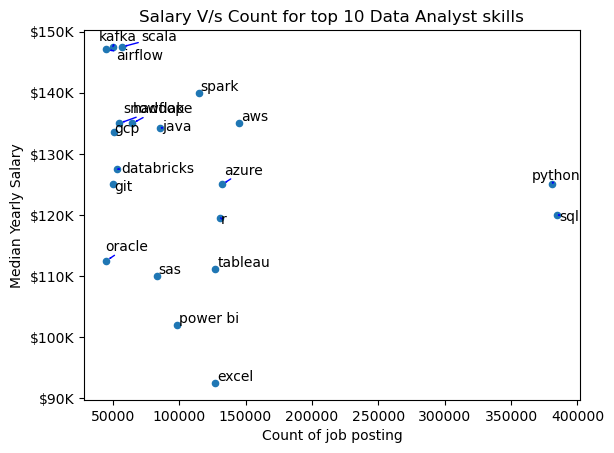

In [69]:
from adjustText import adjust_text
skill_count = 20
skill_stats = skill_stats.sort_values(by='skill_count', ascending=False).head(skill_count)
skill_stats.plot(kind='scatter',x='skill_count',y='median_salary')
ax = plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y , pos : f"${int(y/1000)}K"))

plt.xlabel('Count of job posting')
plt.ylabel('Median Yearly Salary')
plt.title('Salary V/s Count for top 10 Data Analyst skills')
texts = []
for i,txt in enumerate(skill_stats.index):
    texts.append(plt.text(skill_stats['skill_count'].iloc[i], skill_stats['median_salary'].iloc[i], txt))

adjust_text(texts, arrowprops=dict(arrowstyle="->",color='b',lw=1))

plt.tight_layout
plt.show()

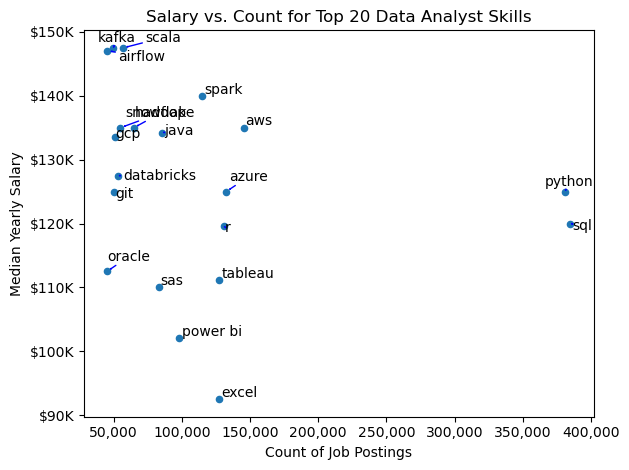

In [ ]:

# This code is from CHATGPT and formats the x axis to have commas in it # 

from adjustText import adjust_text
import matplotlib.pyplot as plt

# Assuming skill_stats is already defined
skill_count = 20
# Sort and select the top 20 skills based on job posting count
skill_stats = skill_stats.sort_values(by='skill_count', ascending=False).head(skill_count)

# Scatter plot of skill count vs. median salary
skill_stats.plot(kind='scatter', x='skill_count', y='median_salary')
ax = plt.gca()

# Formatting the y-axis to show salaries in thousands (e.g., $50K, $100K)
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f"${int(y / 1000)}K"))

# Formatting the x-axis to show commas (e.g., 1,000; 10,000)
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f"{int(x):,}"))

# Setting labels and title
plt.xlabel('Count of Job Postings')
plt.ylabel('Median Yearly Salary')
plt.title('Salary vs. Count for Top 20 Data Analyst Skills')

# Adding text labels to each point in the scatter plot
texts = [
    plt.text(skill_stats['skill_count'].iloc[i], 
             skill_stats['median_salary'].iloc[i], 
             txt)
    for i, txt in enumerate(skill_stats.index)
]

# Adjusting text to avoid overlap, with arrows pointing to their corresponding points
adjust_text(texts, arrowprops=dict(arrowstyle="->", color='b', lw=1))

# Adjust layout to avoid clipping and display the plot
plt.tight_layout()
plt.show()
